# <b>Poisson Distribution</b>

Poisson Distribution describes the number of times of some event occurring during a specified interval.

There are two conditions:

Events occur singly & at random, in a given interval of time or space
λ (lambda), is the mean number of occurrences in the given interval is known and is finite. 

An important note is that λ can only be a positive number.


<img src = "Poisson Distribution.JPG" alt = "Poisson Distribution" height = "600" width = "550" >

And below is a video about Poisson Distribution

In [0]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/8x3pnyYCBto/?start=0&end=139" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## <b>Calculations</b>

The formula is comprised of λ ^ 𝓍 times e ^ -λ divided over 𝓍!. 𝓍 is the number of occurrences that an “event” happens. 

How to Calculate
Example:

The mean number of calls received on a telephone per hours is 1.6. Calculate the probability of the following.

       
1. Exactly two calls will be received in an hour.
2. More than two calls will be received in an hour.
3. Exactly 5 calls will be received in a three hour period. 



So what can be extracted from the question? The mean given is 1.6 per hour, therefore 
λ = 1.6. The 𝓍 can be extracted from each sub question. 


a)  $$P\left( x = 2 \right) = \frac{{e^{ - 1.6 } 1.6 ^2 }}{{2!}}$$
$$= 0.2584$$

b) $$P\left( x > 2 \right) =1 -( \frac{{e^{ - 1.62 } 1.6 ^0 }}{{0!}} + \frac{{e^{ - 1.62 } 1.6 ^1 }}{{1!}} + \frac{{e^{ - 1.6 } 1.6 ^2 }}{{2!}})$$
$$= 0.2166$$

Why minus 1? Because we are trying to figure out the probability for more than 2 calls in an hour, so we calculate for 0 call, 1 call and 2 calls then minus 1 to get the probability for any number of calls that happen in an hour that’s more than 2.

Note that it is more than 2 so we are trying to figure out the probability of 3, 4, 5, ….If it is more than or equal to 2, you should calculate for 2 as well


c) $$P\left( x = 5 \right) = \frac{{e^{ - 4.8 } 4.8 ^5 }}{{5!}}$$
$$= 0.17475$$

Notice that λ is changed to 4.8? Referring to the subquestion, it mentions 5 calls over a three hour period. If you recall, λ = 1.6 is only for an interval of an hour. Since we are looking for 3 hours, we times the λ by 3 thus making it 4.8. 


## <b>Python code</b>

First let's see how we can calculate this manually with python code.
<br>We start by understanding what is needed to calculate.
<br><br>In the formula, we have: Euler's Number, exponents,factorial
<br> We will use example 1 given above.

In [0]:
#1
import math
lmbda = 1.6
x = 2
P = (math.exp(-lmbda)*(lmbda**x))/math.factorial(x)
P

0.25842754303315896

Now try using the above for the remaining Examples 2 and 3 (use the precode given)

In [0]:
#2
import math
lmbda = 1.6
x = [0,1,2]
prob = []
for i in range(len(x)):
    P = (math.exp(-lmbda)*(lmbda**i))/math.factorial(i)
    prob.append(P)
print ("Probability of each x "+str(prob)+"\n")
probSum = sum(prob)
answer = 1-probSum
print ("Answer= "+str(answer))

Probability of each x [0.20189651799465538, 0.3230344287914486, 0.25842754303315896]

Answer= 0.21664151018073707


In [0]:
#3
import math
lmbda = 4.8
x = 5
P = (math.exp(-lmbda)*(lmbda**x))/math.factorial(x)
P

0.17474768364388282

<br><br>Above is the how we could calculate poisson manually using **import math** library. Next we'll try using the ***poisson object*** with ***pmf function*** to do the calculation for us. Similarly, we will use example 1 again.

In [0]:
#1
from scipy.stats import poisson

P = (poisson.pmf(mu=1.6,k=2))
P

0.25842754303315896

This is how we use scipy.stats to calculate the poisson probability for us. **mu=lambda** and **k=x**.
<br>Try it out for Examples 2 and 3 now.

In [0]:
#2
from scipy.stats import poisson

P = 1-((poisson.pmf(mu=1.6 ,k=2 ))+(poisson.pmf(mu=1.6,k=1))+(poisson.pmf(mu=1.6,k=0)))
P

0.21664151018073696

In [0]:
#3
from scipy.stats import poisson

P = (poisson.pmf(mu=4.8 ,k=5 ))
P

0.17474768364388296

## <b>How to create a graph using Python</b>

First up, we have the simple way of creating a graph with just 3 libraries & 9 lines of code.
<br>Below is a given example. 
<br>The lambda used is 1.6 which is calculated with poisson then placed in variable dist. 
<br>For the x, it is arranged with numpy arange from 0 to 10 (used 11.0 because we want to end it at 10). 
<br>Then with pyplot we place variables x and dist with an additional drawstyle to make it look like steps instead of the default line graph.

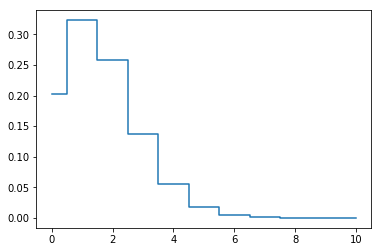

In [0]:
import numpy as np
from scipy.stats import poisson
from matplotlib import pyplot as plt

dist = poisson(mu=1.6)
x = np.arange(0,11.0)

plt.plot(x, dist.pmf(x),drawstyle = 'steps-mid')
plt.show()


But that's just a simple graph which helps but we can improve it. How? By adding in design elements to the graph. 

Now, over here we have the breakdown of the code. Understand the purpose of each part of the code and put it all together in the end to create the Poisson Distribution.

```python
import numpy as np
from scipy.stats import poisson
from matplotlib import pyplot as plt
from matplotlib import ticker as ticker
```


In the above section, these are the imports which are used for creating a Poisson Distribution Graph.

```python 
mu_values = [1.6, 4.8] 
```

Here we create a list of values for the mu (pronounced "mew") which is equal to Lambda in this case. In python however, instead of lambda, mu is used. 

In this certain example, we are using 1.6 and 4.8 as the lambda based on the question. 

```python
linestyles = ['-.', '-']
colors = ['green', 'yellow']
```

Here are the list of linestyles. Here, two are used since there are two lambdas. 
There are four kinds of different linestyles that can be used. '-.', '-', '--', ':'

Create a list for the colors as well. You may choose any color you want. Again, two are used since there are two lambdas.

```python
fig, ax = plt.subplots(figsize=(10, 7))

for mu, linestyles, colors in zip(mu_values, linestyles, colors):
    
    dist = poisson(mu)
    x = np.arange(0, 10.0)

    plt.plot(x, dist.pmf(x), ls = linestyles, color= colors, label=r'$\mu=%0.1f$' % mu, drawstyle = 'steps-mid')
   
    plt.vlines(x, 0, dist.pmf(x), colors='black', lw=1, alpha=0.5)
    
```

<strong>This part of the code is the most important.</strong> 
<br>The graph is created with this block of code. Below are the explanations for each part of the code.

```python
fig, ax = plt.subplots(figsize=(10, 7))
```

'plt.subplots' is to initialize the graph to your needs. Here the figsize (figure size) is set to x-axis to 10 and y-axis to 7. 

```python
for mu, linestyles, colors in zip(mu_values, linestyles, colors):
    # For loop to create a poisson distribution
```

The 'for loop' is to create the poisson distribution graph. There loop parameters are the lists made previously, the lists applied are: mu_values, linestyles and colors. These values are counted into <font color = red>'mu'</font>, <font color = red>'linestyles'</font> and <font color = red>'colors'</font>. 

```python
    dist = poisson(mu)
    x = np.arange(0, 11.0)
```

After that, the variable <font color = blue>'dist'</font> is initialized to be a 'poisson' distribution using <font color = red>'mu'</font> as the parameter. Next, <font color = blue>'x'</font> contains a value range of <font color = green>0 to 11</font>.


```python
    plt.plot(x, dist.pmf(x), ls = linestyles, color= colors, label=r'$\mu=%0.1f$' % mu, drawstyle = 'steps-mid')
    
    plt.vlines(x, 0, dist.pmf(x), colors='black', lw=1, alpha=0.5)
    
```

Now we plot the graph using <font color = blue>'x'</font> for the range of values, <font color = blue>'dist'</font> with the usage of a Probability Mass Function graph with the use of <font color = blue>'x'</font> as the parameter, <font color = red>'linestyles'</font> for the line styling, <font color = red>'colors'</font> for the color of the different lines, label which shows the different <font color = red>'mu'</font> and lastly, the drawstyle being a 'steps-mid' format.

'plt.vlines' to draw vertical lines with respect to the values in the x-axis. Mostly everything is the same except, lw which means line width and alpha is used to control the opacity of the vertical lines. 

```python
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
# xticks to the control the intervals of the x values. In this example, 
#its set to intervals of 1.
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
# ax.yaxis.set_major_formatter is to give further control on how the values on the graph will be projected. 
#In this example, its made to show up to 2 decimal places given as "%0.2f". 
#f = float

plt.yticks(np.arange(min(x), max(x)+1, 0.05)) # yticks to the control the intervals of the y values. In this example, 
#its set to intervals of 0.05.
```

In this section, we have two parts named 'ticks' and 'axis.set_major_formatter'. 

For Jupyter, what we understand as intervals is ticks in Jupyter. We have ticks for x-axis and y-axis. The parameters in ticks are min (minimum), max(maximum) and the distance between each tick (interval). In this case, <font color = blue>'x'</font> is used for min and max. As for distance, x-axis has a tick of 1 and y-axis has a tick of 0.05

In 'axis.set_major_formatter', we control how the string will be formatted which in this case, values in the y-axis shows up to 2 decimal places.

```python
plt.xlim(0, 11) # xlim is to set the limit of the x-axis. Here it's, from 0 to 11
plt.ylim(0, 0.4) # ylim is to set the limit of the y-axis. Here it's, from 0 to 0.4

plt.xlabel('$x$') # Label for x-axis
plt.ylabel(r'$p(x|\mu)$') # Label for y-axis
plt.title('Poisson Distribution') # Title for the graph

plt.legend()
plt.show()
```

Lastly, these codes are just to establish the limits and the labels of the graph and show it. x and y lim is to set the limit which is mentioned above. <br><strong>Below is an example of all the code put together.</strong>

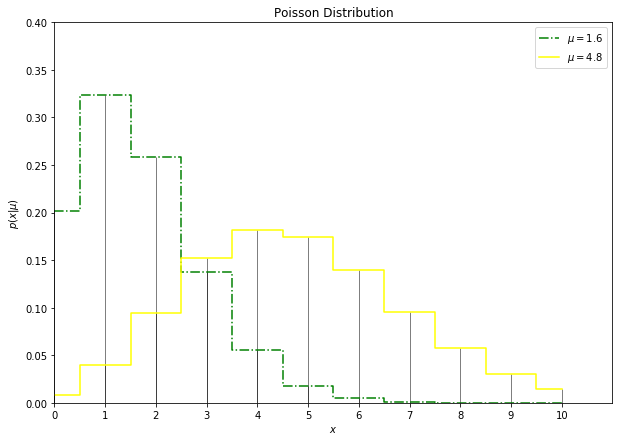

In [0]:
import numpy as np
from scipy.stats import poisson
from matplotlib import pyplot as plt
from matplotlib import ticker as ticker


mu_values = [1.6, 4.8] 

linestyles = ['-.', '-'] 
colors = ['green', 'yellow'] 

fig, ax = plt.subplots(figsize=(10, 7))

for mu, linestyles, colors in zip(mu_values, linestyles, colors):
    # For loop to create a poisson distribution
    dist = poisson(mu)
    x = np.arange(0, 11.0)

    plt.plot(x, dist.pmf(x), ls = linestyles, color= colors, label=r'$\mu=%0.1f$' % mu, drawstyle = 'steps-mid')

    plt.vlines(x, 0, dist.pmf(x), colors='black', lw=1, alpha=0.5)


plt.xticks(np.arange(min(x), max(x)+1, 1.0))

ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))


plt.yticks(np.arange(min(x), max(x)+1, 0.05)) 
    
plt.xlim(0, 11) 
plt.ylim(0, 0.4)

plt.xlabel('$x$') 
plt.ylabel(r'$p(x|\mu)$')
plt.title('Poisson Distribution') 

plt.legend()
plt.show()

You can also create a Cumalative Density Function graph. You only need to change a single part of the code. <br>Change the distribution to <strong>CDF</strong>.


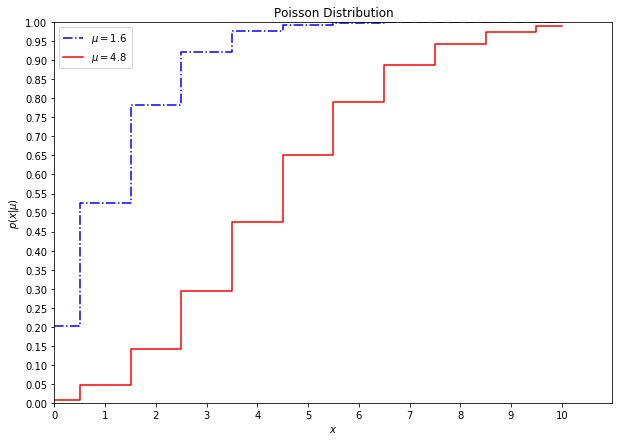

In [0]:
import numpy as np
from scipy.stats import poisson
from matplotlib import pyplot as plt
from matplotlib import ticker as ticker


mu_values = [1.6, 4.8] 
linestyles = ['-.', '-'] 
colors = ['blue', 'red']


fig, ax = plt.subplots(figsize=(10, 7))

for mu, linestyles, colors in zip(mu_values, linestyles, colors):

    dist = poisson(mu)
    x = np.arange(0, 11.0)

    plt.plot(x, dist.cdf(x), ls = linestyles, color= colors, label=r'$\mu=%0.1f$' % mu, drawstyle = 'steps-mid')
    #The change is over here at the plt.plot (dist.cdf)


plt.xticks(np.arange(min(x), max(x)+1, 1.0))

ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))


plt.yticks(np.arange(min(x), max(x)+1, 0.05)) 

    
plt.xlim(0, 11) 
plt.ylim(0, 1.0)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu)$')
plt.title('Poisson Distribution') 

plt.legend()
plt.show()

**Below, is an example on how a poisson distribution with random variables is created.**

```python
s = np.random.poisson( 'lambda', 'sample size')
```

After that, establish the type of chart. Here we use the histogram

```python
count, bins, ignored = plt.hist(s,12,density = True)
```

Then produce the graph with 

```python
plt.show()
```

There are two ways we can do this. Either with Scipy or Numpy.

Here we have the numpy way of making a random sample poisson. 

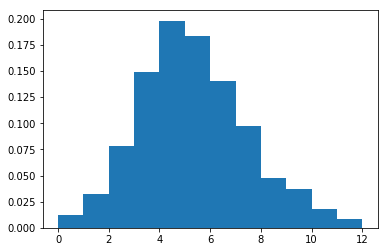

In [0]:
import numpy as np
import matplotlib.pyplot as plt

s = np.random.poisson(4.8,1000)
count, bins, ignored = plt.hist(s,12,density = True)
plt.show()

You can also edit and create labels for the legend of the graph.

Just add 
```python
plt.xlabel('$*insert label name here*$')
plt.ylabel(r'$*insert label name here*$')
plt.title('*insert title of graph here*') 
```
to the code.

And then the Scipy method

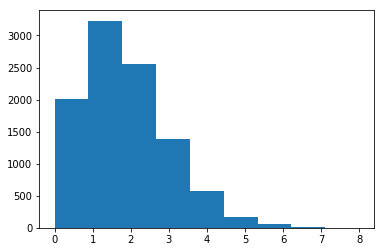

In [0]:
from scipy.stats import poisson
from matplotlib import pyplot as plt

random_poisson = poisson.rvs(mu=1.6, size=10000)
ax = plt.hist(random_poisson, bins=9)

plt.show()

Did you know there is a way to find ur x value based on the probability. The method is called <b>Percent Point Function, PPF</b>. It's the inverse of a Cumalative Density Function.<br>It is used to find how much area is under a curve of a certain point. You may use it like, if you want to find out the x of 80% of the curve.<br><br> 
 [PPF explanation](https://www.statisticshowto.datasciencecentral.com/inverse-distribution-function/) <br><br>
 Below is a code example on how to find the PPF. 
 
 In the example, the lambda(mu) used is 2.4 and the area denoted with <font color='blue'>q</font>

In [0]:
x = poisson.ppf(mu=2.4,q=0.6)
print (x) 

3.0


## <b>Questions</b>

<h5>A student finds that the average number of amoebas in 10 ml of pond water from a particular pond is four. Assuming that the number of amoebas follows a Poisson distribution, find the probability that in a 10 ml sample.
<ol>
    <li>there are exactly five amoebas</li>
    <li>there are no amoebas</li>
    <li>there are fewer than three amoebas</li>
</ol></h5>

<img src= "question4_5_6.png">

<h5>7. An online shop sells computer game at an average rate of 1 per day.

Find the probability that the shop sells more than 10 games in 7 day period.
(you may use jupyter to find out the values)</h5>

<h5>In a village, power cuts occur randomy at a rate of 3 per year.
<br><br>
Find the probability that in any given year there will be<br> 
        &ensp;&ensp;&ensp;8. exactly 7 power cuts<br>
        &ensp;&ensp;&ensp;9. at least 4 power cuts
    
</h5>

<h4>With Jupyter, find out.</h4>

<h5>Patients arrive at a hospital accident and emergency departmen at random at a rate of 6 per hour.

Find the probability that, during any 90 minute period, the number of patients arriving at the hospital accident and emergency department is <br><br>
10. exactly 7 <br>
11. at least 10</h5>

<h5>Now,

A patient comes at 11:30. 

12. Find the probability that the next patient arrives before 11:45am. (You may use Jupyter or normal calculation)</h5>

<h5>13. Create a random poisson distribution. Lambda is 8. Sample size 3000. 20 bins.Find out which bin contains the most probability.</h5>

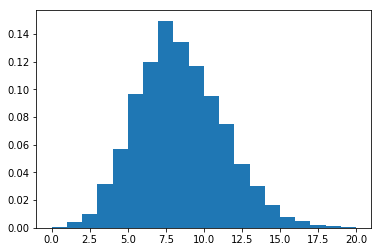

In [0]:
#Answer #Because it is random. Answers will vary.
import numpy as np
import matplotlib.pyplot as plt
s = np.random.poisson(8,3000)
count, bins, ignored = plt.hist(s,20,density = True)

plt.show()

<h5>14. Now, add in the legend for the graph. Label the x and y axis as well as the title of the graph.</h5>

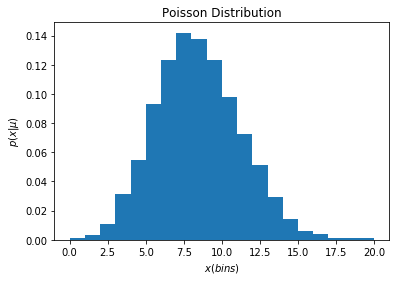

In [0]:
#Answer #Because it is random. Answers will vary.
import numpy as np
import matplotlib.pyplot as plt
s = np.random.poisson(8,3000)
count, bins, ignored = plt.hist(s,20,density = True)

plt.xlabel('$x(bins)$')
plt.ylabel(r'$p(x|\mu)$')
plt.title('Poisson Distribution') 


plt.show()

<h5>15. Create a poisson distribution with lambdas 2.3, 4 and 9. Give the x values for X = 3 & X = 5.</h5>

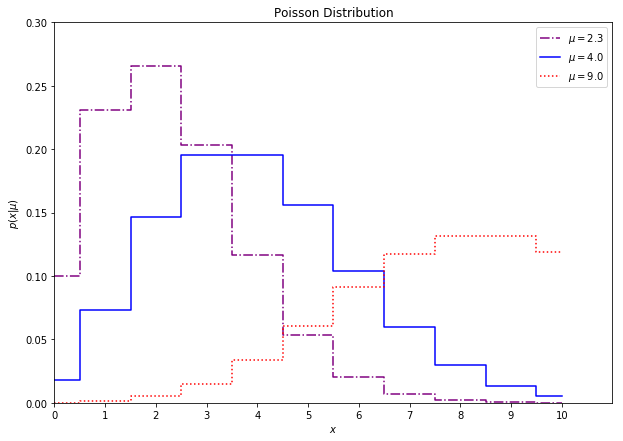

In [0]:
#Answer
import numpy as np
from scipy.stats import poisson
from matplotlib import pyplot as plt
from matplotlib import ticker as ticker

mu_values = [2.3, 4.0,9.0] 
linestyles = ['-.', '-', ':'] 
colors = ['purple', 'blue', 'red'] 

fig, ax = plt.subplots(figsize=(10, 7))

for mu, linestyles, colors in zip(mu_values, linestyles, colors):
    dist = poisson(mu)
    x = np.arange(0, 11.0)

    plt.plot(x, dist.pmf(x), ls = linestyles, color= colors, label=r'$\mu=%0.1f$' % mu, drawstyle = 'steps-mid')
    
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
plt.yticks(np.arange(min(x), max(x)+1, 0.05)) 

    
plt.xlim(0, 11)
plt.ylim(0, 0.3) 

plt.xlabel('$x$') 
plt.ylabel(r'$p(x|\mu)$') 
plt.title('Poisson Distribution') 

plt.legend()
plt.show()

<h5>16. With the same lambda values and make a cumalative density function. Find the x values for y=0.65 </h5>

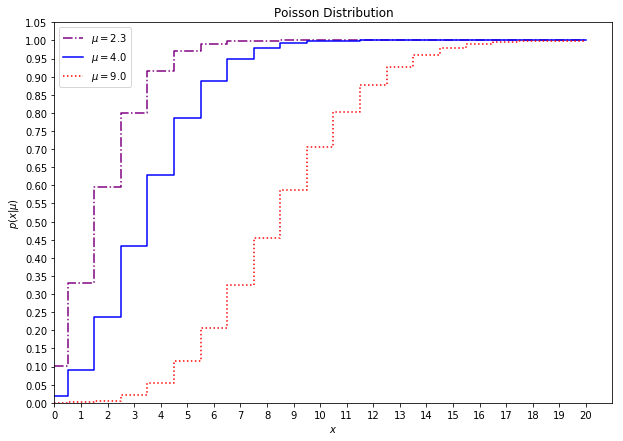

In [0]:
#Answer
import numpy as np
from scipy.stats import poisson
from matplotlib import pyplot as plt
from matplotlib import ticker as ticker

mu_values = [2.3, 4.0,9.0] 
linestyles = ['-.', '-', ':'] 
colors = ['purple', 'blue', 'red'] 

fig, ax = plt.subplots(figsize=(10, 7))

for mu, linestyles, colors in zip(mu_values, linestyles, colors):
    dist = poisson(mu)
    x = np.arange(0, 21.0)

    plt.plot(x, dist.cdf(x), ls = linestyles, color= colors, label=r'$\mu=%0.1f$' % mu, drawstyle = 'steps-mid')
    
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
plt.yticks(np.arange(min(x), max(x)+1, 0.05)) 

    
plt.xlim(0, 21)
plt.ylim(0, 1.05) 

plt.xlabel('$x$') 
plt.ylabel(r'$p(x|\mu)$') 
plt.title('Poisson Distribution') 

plt.legend()
plt.show()

<h5>17. Make a cumalative density function. Use lambda = 5.4. Find out if $P\left( x > 6 \right)$ </h5>

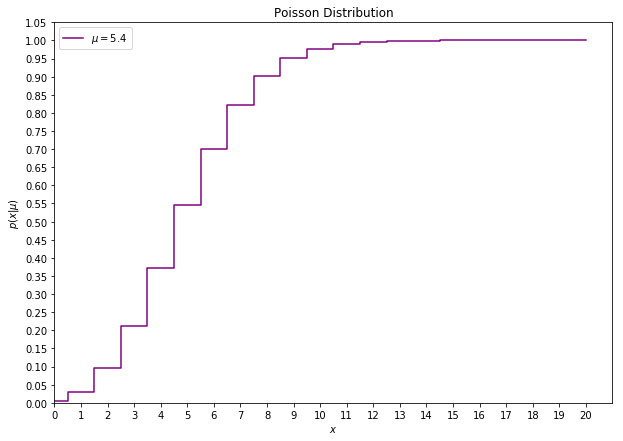

In [0]:
#Answer
import numpy as np
from scipy.stats import poisson
from matplotlib import pyplot as plt
from matplotlib import ticker as ticker

mu_values = [5.4] 
linestyles = ['-'] 
colors = ['purple'] 

fig, ax = plt.subplots(figsize=(10, 7))

for mu, linestyles, colors in zip(mu_values, linestyles, colors):
    dist = poisson(mu)
    x = np.arange(0, 21.0)

    plt.plot(x, dist.cdf(x), ls = linestyles, color= colors, label=r'$\mu=%0.1f$' % mu, drawstyle = 'steps-mid')
    
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
plt.yticks(np.arange(min(x), max(x)+1, 0.05)) 

    
plt.xlim(0, 21)
plt.ylim(0, 1.05) 

plt.xlabel('$x$') 
plt.ylabel(r'$p(x|\mu)$') 
plt.title('Poisson Distribution') 

plt.legend()
plt.show()

<strong>Answer</strong>

$P\left( x > 6 \right)$ is <strong>0.2984</strong>.<br>
Go to <em>x=6</em> on the graph and then 1 - 0.7016

<h5>18. Make a random sample poisson with lambda = 3.9 and sample size=1000</h5>

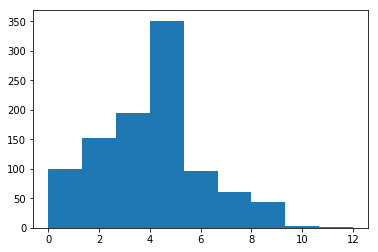

In [0]:
#Answer
from scipy.stats import poisson
from matplotlib import pyplot as plt

random_poisson = poisson.rvs(mu=3.9, size=1000)
ax = plt.hist(random_poisson, bins=9)

plt.show()

<h5>19. Now find the x with the total area being 60%. Hint: Use PPF</h5>

In [0]:
#Answer
x = poisson.ppf(mu=3.9, q=0.6)
x

4.0

<h5>20. Make a CDF of lambda = 7. Then, find the PPF for the area under the curve = 0.54.</h5>

7.0


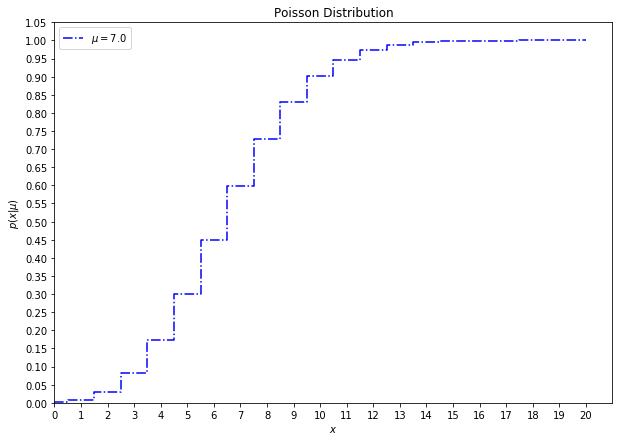

In [0]:
#Answer
import numpy as np
from scipy.stats import poisson
from matplotlib import pyplot as plt
from matplotlib import ticker as ticker

mu_values = [7] 
linestyles = ['-.'] 
colors = ['blue'] 

fig, ax = plt.subplots(figsize=(10, 7))

for mu, linestyles, colors in zip(mu_values, linestyles, colors):
    dist = poisson(mu)
    x = np.arange(0, 21.0)

    plt.plot(x, dist.cdf(x), ls = linestyles, color= colors, label=r'$\mu=%0.1f$' % mu, drawstyle = 'steps-mid')
    
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
plt.yticks(np.arange(min(x), max(x)+1, 0.05)) 

    
plt.xlim(0, 21)
plt.ylim(0, 1.05) 

plt.xlabel('$x$') 
plt.ylabel(r'$p(x|\mu)$') 
plt.title('Poisson Distribution') 

lel = poisson.ppf(mu=7, q=0.54)
print (lel)

plt.legend()
plt.show()